# **Classify the Emails into Spam or Not.**

# Importing Libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [123]:
df = pd.read_csv('spam_or_not_spam.csv')
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


# Understanding the Data

In [124]:
df.dtypes

email    object
label     int64
dtype: object

In [125]:
df.shape

(3000, 2)

In [126]:
df.size

6000

In [127]:
df.columns

Index(['email', 'label'], dtype='object')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [129]:
df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [130]:
df.nunique()

email    2872
label       2
dtype: int64

In [131]:
df.isnull().any()

email     True
label    False
dtype: bool

# Data Visualization

<Axes: >

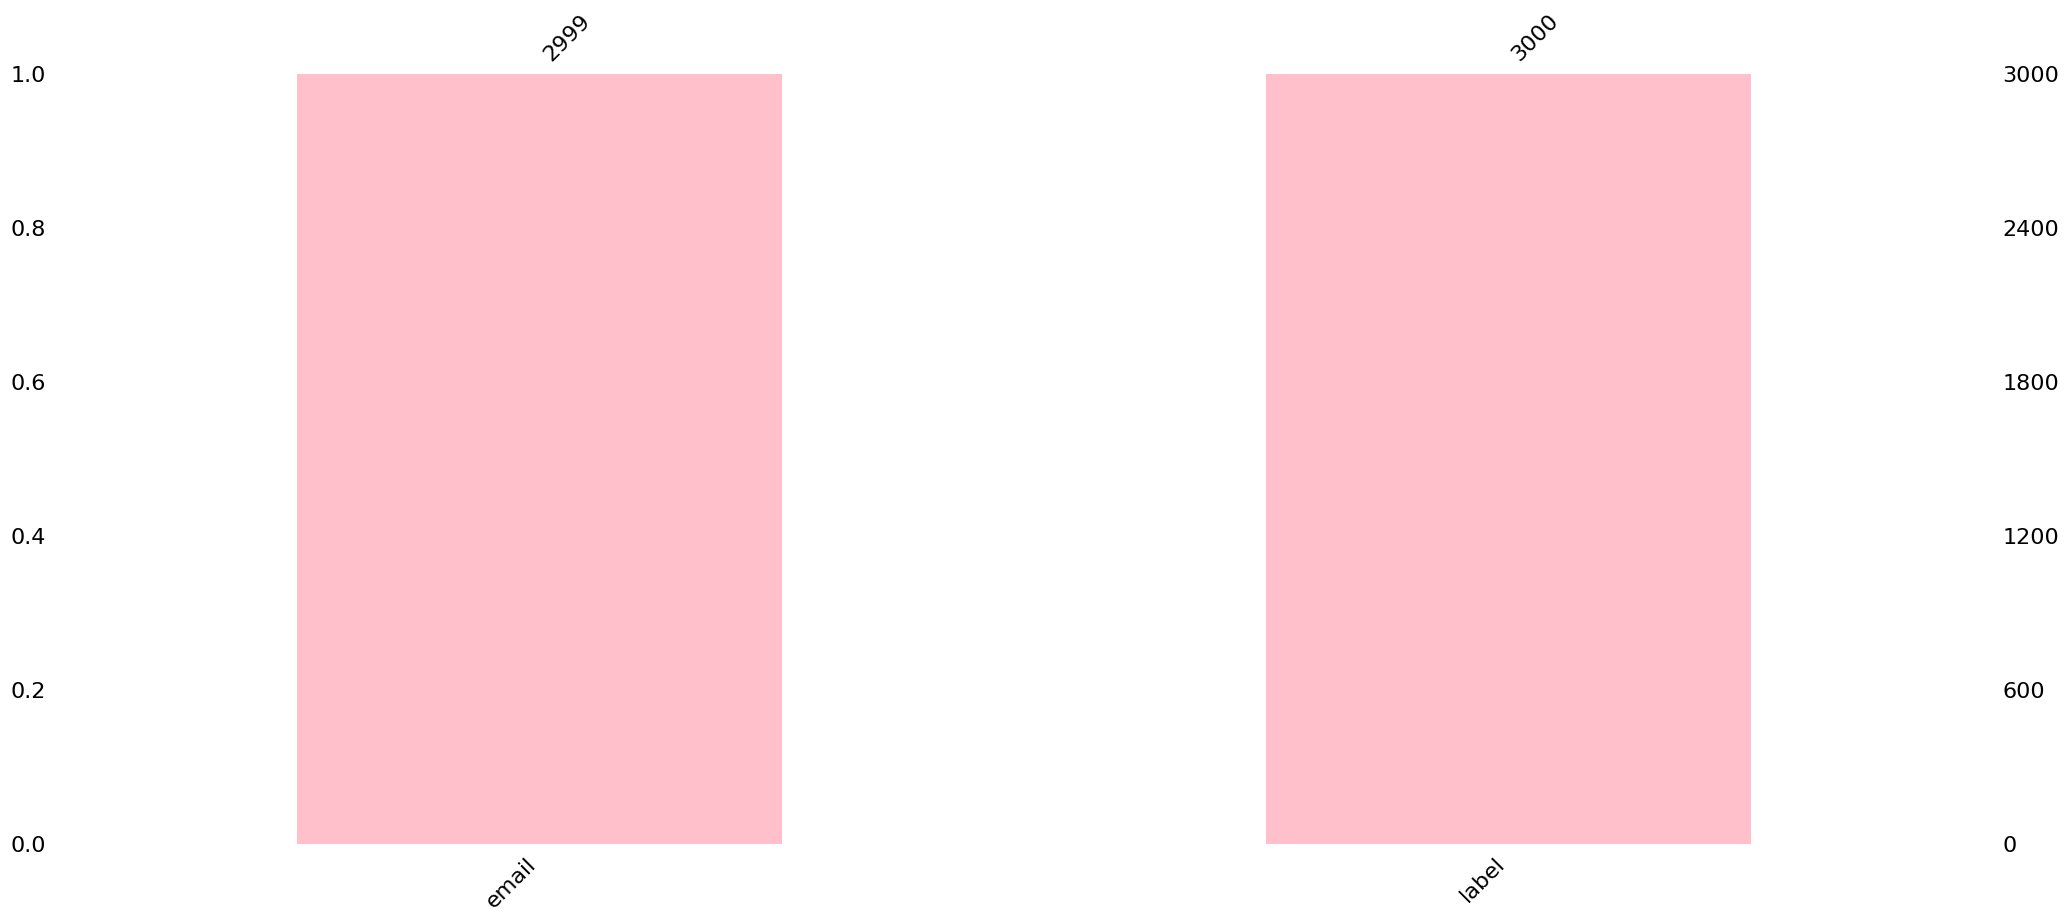

In [132]:
import missingno as no
no.bar(df, color='pink')

<Axes: >

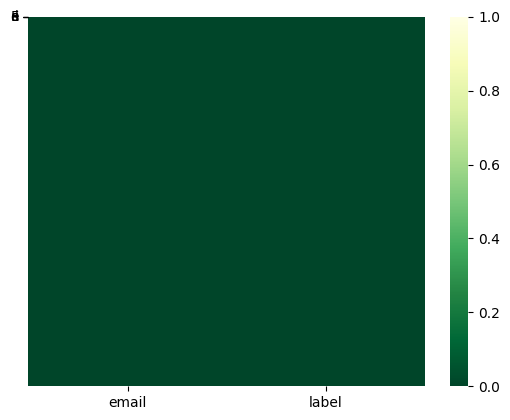

In [133]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='YlGn_r')

In [134]:
df = df.dropna()

In [135]:
df.isnull().sum()

email    0
label    0
dtype: int64

<Axes: ylabel='count'>

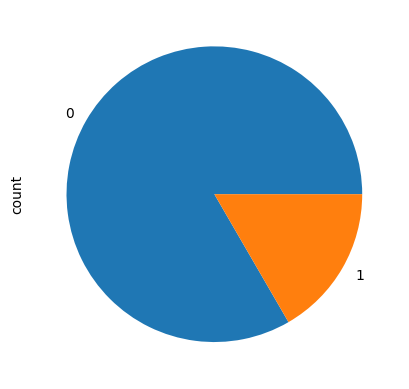

In [136]:
df.label.value_counts().plot(kind ='pie')

C:\Users\ayush\AppData\Local\Temp\ipykernel_2072\386857235.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='gist_rainbow')


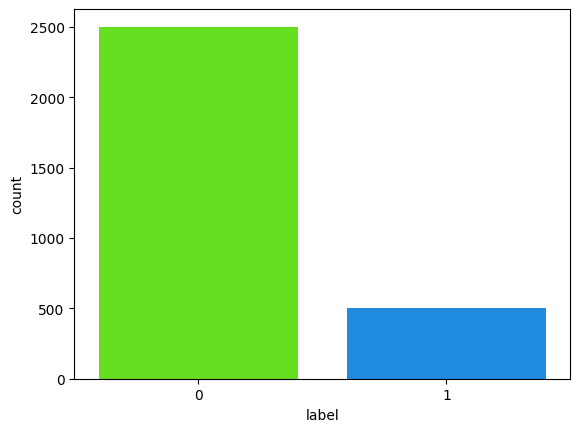

In [137]:
sns.countplot(x='label', data=df, palette='gist_rainbow')
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_2072\2209339926.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['label'], color='y')


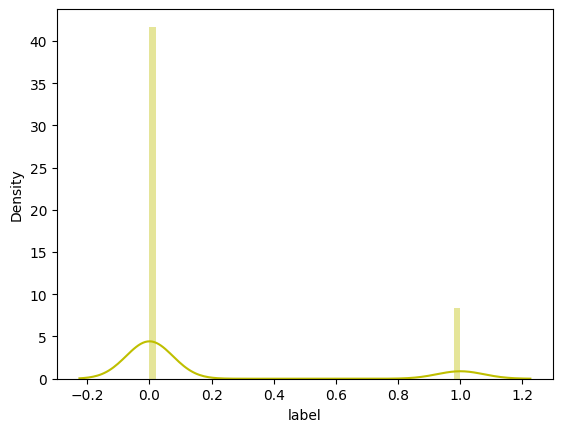

In [138]:
sns.distplot(df['label'], color='y')
plt.show()

# Splitting the Data into Dependent and Indpendent variables

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [140]:
x = df['email']
X = tfidf.fit_transform(x)
y = df['label']

# Training and Testing the Data

In [141]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=10)

In [142]:
from sklearn.metrics import precision_score

# Finding Best Predective Model

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [144]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [145]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [146]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [147]:
train_classifier(svc,Xtrain,ytrain,Xtest,ytest)

(0.9786666666666667, 0.9818181818181818)

In [148]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, Xtrain,ytrain,Xtest,ytest)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9786666666666667
Precision -  0.9818181818181818
For  KN
Accuracy -  0.9546666666666667
Precision -  0.84375
For  NB
Accuracy -  0.8893333333333333
Precision -  1.0
For  DT
Accuracy -  0.9413333333333334
Precision -  0.8482142857142857
For  LR
Accuracy -  0.956
Precision -  0.989010989010989
For  RF
Accuracy -  0.976
Precision -  1.0
For  AdaBoost
Accuracy -  0.972
Precision -  0.963302752293578
For  BgC
Accuracy -  0.9733333333333334
Precision -  0.9112903225806451
For  ETC
Accuracy -  0.9733333333333334
Precision -  0.9811320754716981
For  GBDT
Accuracy -  0.9653333333333334
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9866666666666667
Precision -  0.9516129032258065


In [149]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [150]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.889333,1.000000
5,RF,0.976000,1.000000
4,LR,0.956000,0.989011
0,SVC,0.978667,0.981818
8,ETC,0.973333,0.981132
6,AdaBoost,0.972000,0.963303
10,xgb,0.986667,0.951613
9,GBDT,0.965333,0.944444
7,BgC,0.973333,0.911290
3,DT,0.941333,0.848214


# Random Forest Classifier

In [151]:
rfc.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=50, random_state=2)

# Prediction

In [152]:
ypred_train = rfc.predict(Xtrain)
ypred_test = rfc.predict(Xtest)

# Confusion Matrix

In [153]:
cm = np.array(confusion_matrix(ytest, ypred_test))
cm

array([[628,   0],
       [ 18, 104]])

<Axes: >

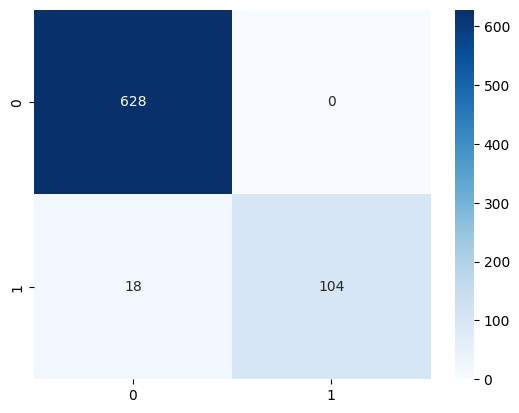

In [154]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='Blues', fmt='g')

# Accuracy

In [155]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 100.0
Accuracy of testing data: 97.6


# Precision

In [156]:
print("Precision of training data:", precision_score(ytrain, ypred_train)*100)
print("Precision of testing data:", precision_score(ytest, ypred_test)*100)

Precision of training data: 100.0
Precision of testing data: 100.0
